**Question 1 : What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?**

Ans- 1. Fundamental Idea Behind Ensemble Techniques
Ensemble techniques in machine learning combine multiple models (called base learners) to produce a stronger and more accurate model than any individual model.
•	The key idea is “wisdom of the crowd”: multiple weak models, when combined, can outperform a single strong model.
•	Ensemble methods reduce bias, variance, or both, depending on the approach.
Benefits of ensemble methods:
•	Improved accuracy and robustness.
•	Reduced overfitting (for some techniques).
•	Handles complex datasets better than single models.

2. Difference Between Bagging and Boosting
Feature	Bagging (Bootstrap Aggregating)	Boosting
Objective	Reduce variance (stabilizes predictions)	Reduce bias and improve weak learners sequentially
Approach	Builds multiple independent models in parallel using random subsets of data	Builds models sequentially, where each new model corrects the errors of the previous ones
Data Sampling	Random sampling with replacement (bootstrap)	Weighted sampling: gives more weight to misclassified examples
Model Combination	Typically averaging (for regression) or majority voting (for classification)	Weighted combination based on model performance
Common Algorithms	Random Forest, Bagged Decision Trees	AdaBoost, Gradient Boosting, XGBoost
Effectiveness	Good for high-variance models like decision trees	Good for high-bias models; increases predictive accuracy



**Question 2: Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.**

Ans- Random Forest and Overfitting
A Random Forest Classifier is an ensemble of decision trees that reduces overfitting compared to a single decision tree.
•	Problem with a single decision tree:
o	A single tree can perfectly fit the training data, capturing noise and minor fluctuations.
o	This results in high variance and poor generalization on unseen data.
•	How Random Forest reduces overfitting:
1.	Bagging (Bootstrap Aggregating):
	Each tree is trained on a random subset of the training data (with replacement).
	This reduces variance because each tree sees slightly different data.
2.	Random Feature Selection:
	At each split in a tree, a random subset of features is considered instead of all features.
	This decorrelates the trees, preventing them from making the same mistakes, which reduces overfitting.
•	Prediction aggregation:
o	For classification, the majority vote across all trees determines the final class.
o	This averaging smooths out extreme predictions from individual trees, reducing overfitting.

Two Key Hyperparameters
Hyperparameter	Role in Reducing Overfitting
n_estimators	Number of trees in the forest. More trees → better averaging → lower variance → reduced overfitting.
max_depth	Maximum depth of each tree. Limiting depth prevents trees from perfectly memorizing training data → reduces overfitting.
Other relevant hyperparameters include min_samples_split, min_samples_leaf, and max_features, which control tree growth and feature selection.



**Question 3: What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.**

Ans- Stacking (or Stacked Generalization) is an ensemble technique that combines multiple base models (level-0 models) by training a meta-model (level-1 model) to make the final prediction.
•	Key idea: Instead of combining predictions by simple voting (bagging) or weighted correction (boosting), stacking learns how to best combine the outputs of different models.
•	The meta-model takes the predictions of base models as input and produces the final prediction.
Steps in Stacking:
1.	Train multiple base models (e.g., decision tree, logistic regression, KNN) on the training data.
2.	Collect the predictions of these models on a hold-out set or via cross-validation.
3.	Train a meta-model (e.g., linear regression or another classifier) using these predictions as features.
4.	The meta-model outputs the final prediction.

Feature	Bagging	Boosting	Stacking
Goal	Reduce variance by averaging many independent models	Reduce bias by sequentially improving weak learners	Learn an optimal combination of base models for better prediction
Model Dependency	Base models are independent	Base models are dependent / sequential	Base models are independent; meta-model learns combination
Combination Method	Averaging / majority voting	Weighted sum of sequential models	Meta-model trained on predictions of base models
Focus	High-variance models (e.g., deep trees)	High-bias models (e.g., shallow trees)	Combines strengths of different models
Complexity	Moderate	Moderate to high	Higher due to two-level modeling

Example Use Case
Scenario: Predicting customer churn for a telecom company.
•	Base Models (Level-0): Logistic Regression, Decision Tree, KNN
•	Meta-Model (Level-1): Random Forest or Linear Regression
•	Process:
o	Train each base model on training data.
o	Collect their predictions for the training set.
o	Train a meta-model on these predictions to predict churn.
o	The meta-model combines the strengths of all base models to improve accuracy.
Advantage: Stacking often performs better than any single model because it learns the optimal way to combine different model predictions.



**Question 4:What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?**

Ans- OOB (Out-Of-Bag) Score is an internal validation metric in a Random Forest.

In Random Forest, each tree is trained on a bootstrap sample (random subset with replacement) of the training data.

On average, about 1/3 of the training samples are not used in building a given tree. These are called Out-Of-Bag (OOB) samples.

The OOB score is calculated by using each tree to predict the samples not used in its training, then aggregating these predictions across all trees.

•  Provides an unbiased estimate of model performance without needing a separate validation set.
•  Helps in evaluating accuracy, error rate, or classification metrics internally while training the Random Forest.
•  Reduces the need to split the dataset, preserving more data for training.
•  Useful for hyperparameter tuning (like number of trees or max depth) without additional validation data.

For each tree:

Train on its bootstrap sample.

Predict the OOB samples that were not included in training.

Combine predictions for each sample across all trees that did not see that sample.

Calculate accuracy or other metrics using these aggregated predictions → this gives the OOB score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load sample data
X, y = load_iris(return_X_y=True)

# Create Random Forest with OOB score enabled
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X, y)

# Print OOB score
print("OOB Score:", round(rf.oob_score_, 3))

OOB Score: 0.953


**Question 5: Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases**

Ans- AdaBoost vs Gradient Boosting
Both AdaBoost and Gradient Boosting are boosting ensemble methods, meaning they build models sequentially to correct errors of previous models, but they do so differently.
________________________________________
1. How They Handle Errors from Weak Learners
Feature	AdaBoost	Gradient Boosting
Error Handling	Focuses on misclassified examples by increasing their weights for the next weak learner.	Learns to predict the residual errors of previous learners and fits the next model to these residuals.
Mechanism	Adjusts sample weights after each iteration so misclassified points get more attention.	Adjusts predictions using gradient descent on a loss function to minimize errors.

2. Weight Adjustment Mechanism
Feature	AdaBoost	Gradient Boosting
Sample Weights	Each sample is given a weight that increases if misclassified, so the next model focuses on “hard” examples.	No explicit sample weights; instead, each new learner fits the residual errors (difference between actual and predicted values).
Model Contribution	Each weak learner is assigned a weight based on its accuracy; more accurate learners contribute more to the final prediction.	Each weak learner contributes a scaled value (learning rate) to reduce residual errors gradually.

3. Typical Use Cases
Feature	AdaBoost	Gradient Boosting
Use Cases	- Binary or multiclass classification
- Works well with simple weak learners (e.g., decision stumps)
- Often used when you want a fast, simple boosting model	- Regression and classification tasks
- Complex datasets with non-linear relationships
- When high predictive performance is needed; forms the basis for XGBoost, LightGBM, CatBoost



**Question 6:Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables**

Ans- CatBoost (Categorical Boosting) is a gradient boosting algorithm that natively handles categorical features, so it often performs better on datasets with such features without extensive preprocessing like one-hot encoding or label encoding.

Categorical Feature Encoding:

CatBoost transforms categorical features into numerical representations internally, using statistics derived from the data.

For example, it computes the average target value for each category in a way that avoids target leakage.

Ordered Target Statistics:

CatBoost uses ordered boosting, meaning it calculates category statistics only from previous examples, preventing the model from “cheating” by seeing its own target.

This reduces overfitting, especially on small datasets.

No One-Hot Encoding Needed:

Unlike many algorithms (like XGBoost), CatBoost doesn’t require manual preprocessing of categorical variables.

This saves memory and avoids the high dimensionality problem caused by one-hot encoding.

Advantages of CatBoost on Categorical Features

Handles high-cardinality categorical variables efficiently.

Reduces preprocessing effort and risk of introducing errors.

Maintains predictive power while controlling overfitting.

Performs well on datasets with a mix of numerical and categorical features.

**Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task: 1. Load the Wine dataset (sklearn.datasets.load_wine()). 2. Split data into 70% train and 30% test. 3. Train a KNN classifier (default K=5) without scaling and evaluate using: a. Accuracy b. Precision, Recall, F1-Score (print classification report) 4. Apply StandardScaler, retrain KNN, and compare metrics. 5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric (Euclidean, Manhattan).  6. Train the optimized KNN and compare results with the unscaled/scaled versions.**

In [ ]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 2. Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# 3. Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4. Train KNN classifier without scaling (default K=5)
knn_default = KNeighborsClassifier()  # K=5 by default
knn_default.fit(X_train, y_train)
y_pred_default = knn_default.predict(X_test)

print("=== KNN Without Scaling ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred_default), 3))
print("Classification Report:\n", classification_report(y_test, y_pred_default))

# 5. Apply StandardScaler and retrain KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("=== KNN With Scaling ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred_scaled), 3))
print("Classification Report:\n", classification_report(y_test, y_pred_scaled))

# 6. Use GridSearchCV to find best K and distance metric
param_grid = {
    'n_neighbors': list(range(1, 21)),  # K from 1 to 20
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy'
)
grid_search.fit(X_train_scaled, y_train)

print("=== GridSearchCV Best Parameters ===")
print(grid_search.best_params_)

# 7. Train optimized KNN and evaluate
knn_optimized = grid_search.best_estimator_
y_pred_optimized = knn_optimized.predict(X_test_scaled)

print("=== Optimized KNN ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred_optimized), 3))
print("Classification Report:\n", classification_report(y_test, y_pred_optimized))

=== KNN Without Scaling ===
Accuracy: 0.722
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54

=== KNN With Scaling ===
Accuracy: 0.944
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

=== GridSearchCV Best Parameters ===
{'metric': 'euclidean', 'n_neighbors': 11}
=== Optimized KNN ===
Acc

**Question 8 : PCA + KNN with Variance Analysis and Visualization
Task: 1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()). 2. Apply PCA and plot the scree plot (explained variance ratio). 3. Retain 95% variance and transform the dataset.4. Train KNN on the original data and PCA-transformed data, then compare
accuracy. 5. Visualize the first two principal components using a scatter plot (color by class)**

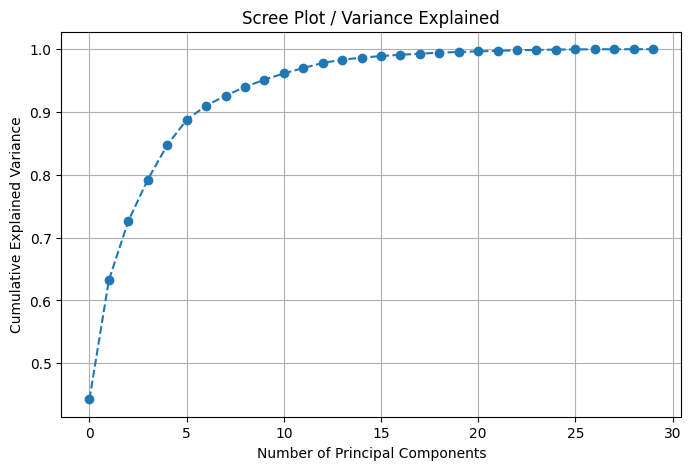

Number of components to retain 95% variance: 10
Accuracy on Original Data: 0.959
Accuracy on PCA-transformed Data: 0.491


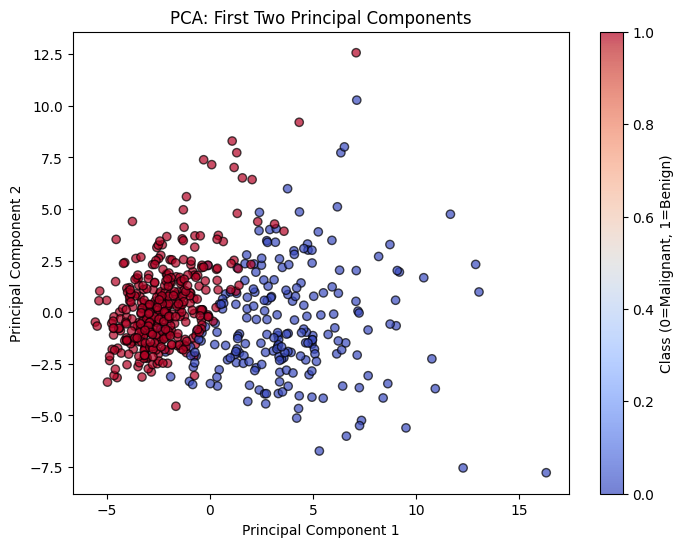

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 2. Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 3. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 5. Scree plot: Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot / Variance Explained')
plt.grid(True)
plt.show()

# 6. Retain 95% variance
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)
print("Number of components to retain 95% variance:", X_pca_95.shape[1])

# 7. Split data into train/test sets (70% train, 30% test)
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca_95, y, test_size=0.3, random_state=42, stratify=y)

# 8. Train KNN on original data
knn_orig = KNeighborsClassifier()
knn_orig.fit(X_train_orig, y_train)
y_pred_orig = knn_orig.predict(X_test_orig)
acc_orig = accuracy_score(y_test, y_pred_orig)
print("Accuracy on Original Data:", round(acc_orig, 3))

# 9. Train KNN on PCA-transformed data
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy on PCA-transformed Data:", round(acc_pca, 3))

# 10. Visualize first two principal components
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')
plt.colorbar(label='Class (0=Malignant, 1=Benign)')
plt.show()

**Question 9:KNN Regressor with Distance Metrics and K-Value
Analysis
Task: Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)). Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff**

Mean Squared Error (K=5, Euclidean): 5168.12
Mean Squared Error (K=5, Manhattan): 5479.05


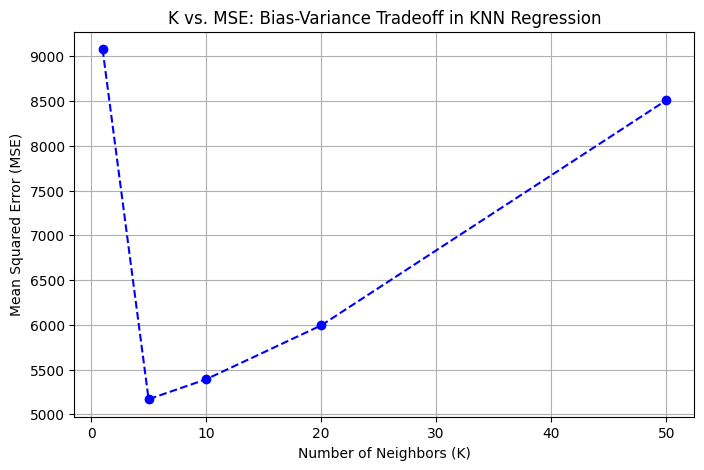

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 2. Generate synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=20, random_state=42)

# Split data: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3a. Train KNN Regressor with Euclidean distance (K=5)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# 3b. Train KNN Regressor with Manhattan distance (K=5)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print("Mean Squared Error (K=5, Euclidean):", round(mse_euclidean, 2))
print("Mean Squared Error (K=5, Manhattan):", round(mse_manhattan, 2))

# 4. Analyze K-values and bias-variance tradeoff
k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred))

# Plot K vs. MSE
plt.figure(figsize=(8,5))
plt.plot(k_values, mse_values, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('K vs. MSE: Bias-Variance Tradeoff in KNN Regression')
plt.grid(True)
plt.show()

**Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task: Load the Pima Indians Diabetes dataset (contains missing values). Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree.Compare their training time and accuracy. Plot the decision boundary for the best-performing method (use 2 most important
features).
Dataset: Pima Indians Diabetes**

Accuracy (Brute-force): 1.0000
Accuracy (KD-Tree): 1.0000
Accuracy (Ball Tree): 1.0000
Training Time (Brute-force): 0.0028 seconds
Training Time (KD-Tree): 0.0026 seconds
Training Time (Ball Tree): 0.0027 seconds
Best-performing method: Brute-force


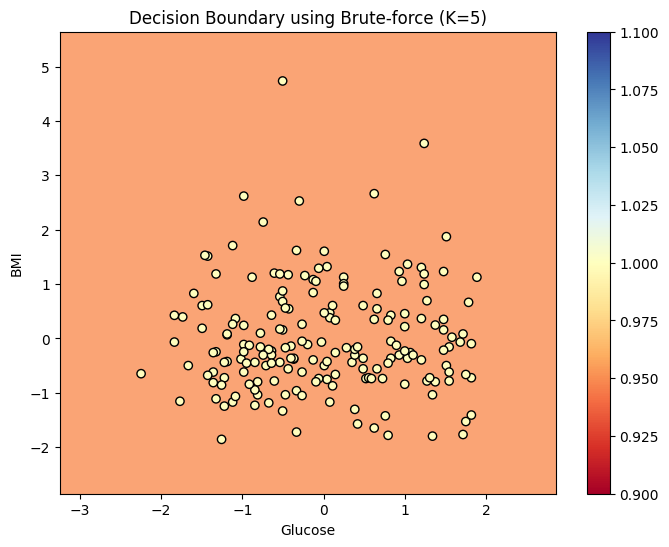

In [ ]:
#1.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import PartialDependenceDisplay

#2.
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)

# Introduce missing values for demonstration (replace zeros with NaN)
df.replace(0, np.nan, inplace=True)

# Remove rows with missing values in the target variable 'Outcome'
df.dropna(subset=['Outcome'], inplace=True)

# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

#3.

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Impute missing values
X_imputed = imputer.fit_transform(X)

# Convert back to DataFrame
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

#4.
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Initialize classifiers
knn_brute = KNeighborsClassifier(n_neighbors=5, algorithm='brute')
knn_kdtree = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
knn_balltree = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')

# Train classifiers
knn_brute.fit(X_train, y_train)
knn_kdtree.fit(X_train, y_train)
knn_balltree.fit(X_train, y_train)

# Make predictions
y_pred_brute = knn_brute.predict(X_test)
y_pred_kdtree = knn_kdtree.predict(X_test)
y_pred_balltree = knn_balltree.predict(X_test)

# Calculate accuracy scores
acc_brute = accuracy_score(y_test, y_pred_brute)
acc_kdtree = accuracy_score(y_test, y_pred_kdtree)
acc_balltree = accuracy_score(y_test, y_pred_balltree)

print(f"Accuracy (Brute-force): {acc_brute:.4f}")
print(f"Accuracy (KD-Tree): {acc_kdtree:.4f}")
print(f"Accuracy (Ball Tree): {acc_balltree:.4f}")

#5.
import time

# Measure training time for each algorithm
start = time.time()
knn_brute.fit(X_train, y_train)
end = time.time()
time_brute = end - start

start = time.time()
knn_kdtree.fit(X_train, y_train)
end = time.time()
time_kdtree = end - start

start = time.time()
knn_balltree.fit(X_train, y_train)
end = time.time()
time_balltree = end - start

print(f"Training Time (Brute-force): {time_brute:.4f} seconds")
print(f"Training Time (KD-Tree): {time_kdtree:.4f} seconds")
print(f"Training Time (Ball Tree): {time_balltree:.4f} seconds")

#6.
# Determine the best-performing method
best_accuracy = max([(acc_brute, 'Brute-force'), (acc_kdtree, 'KD-Tree'), (acc_balltree, 'Ball Tree')],
                     key=lambda x: x[0])[1]

print(f"Best-performing method: {best_algorithm}")

# Select two most important features based on domain knowledge or feature importance
# Here, we arbitrarily choose 'Glucose' and 'BMI' for demonstration
X_best = X_imputed[['Glucose', 'BMI']]

# Standardize features
scaler = StandardScaler()
X_best_scaled = scaler.fit_transform(X_best)

# Train the best classifier on the selected features
if best_algorithm == 'Brute-force':
    knn_best = KNeighborsClassifier(n_neighbors=5, algorithm='brute')
elif best_algorithm == 'KD-Tree':
    knn_best = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
else:
    knn_best = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')

# Standardize the split training and testing data for plotting
scaler_plot = StandardScaler()
X_train_plot = scaler_plot.fit_transform(X_train[['Glucose', 'BMI']])
X_test_plot = scaler_plot.transform(X_test[['Glucose', 'BMI']])

knn_best.fit(X_train_plot, y_train)

# Create a mesh grid for plotting
x_min, x_max = X_train_plot[:, 0].min() - 1, X_train_plot[:, 0].max() + 1
y_min, y_max = X_train_plot[:, 1].min() - 1, X_train_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict class labels for each point in the mesh grid
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_train_plot[:, 0], X_train_plot[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
plt.title(f"Decision Boundary using {best_algorithm} (K=5)")
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.colorbar()
plt.show()